# Transaction Data Analysis

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

dat_trans = pd.read_csv("transaction_data.csv")

In [33]:
dat_trans.head()

,Transaction ID,Sender Account ID,Receiver Account ID,Transaction Amount,Transaction Type,Timestamp,Transaction Status,Fraud Flag,Geolocation (Latitude/Longitude),Device Used
0,TXN9520068950,ACC14994,ACC16656,495.90,Deposit,1/17/2025 10:14,Failed,True,"34.0522 N, -74.006 W",Desktop
1,TXN9412011085,ACC58958,ACC32826,529.62,Withdrawal,1/17/2025 10:51,Success,False,"35.6895 N, -118.2437 W",Mobile
2,TXN4407425052,ACC56321,ACC92481,862.47,Withdrawal,1/17/2025 10:50,Failed,False,"48.8566 N, 2.3522 W",Mobile
3,TXN2214150284,ACC48650,ACC76457,1129.88,Transfer,1/17/2025 10:56,Success,True,"34.0522 N, -74.006 W",Mobile
4,TXN4247571145,ACC60921,ACC11419,933.24,Deposit,1/17/2025 10:25,Success,True,"55.7558 N, 37.6173 W",Mobile


# Data Exploration on the dataset

In [34]:
dat_trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Transaction ID                    1000 non-null   object 
 1   Sender Account ID                 1000 non-null   object 
 2   Receiver Account ID               1000 non-null   object 
 3   Transaction Amount                1000 non-null   float64
 4   Transaction Type                  1000 non-null   object 
 5   Timestamp                         1000 non-null   object 
 6   Transaction Status                1000 non-null   object 
 7   Fraud Flag                        1000 non-null   bool   
 8   Geolocation (Latitude/Longitude)  1000 non-null   object 
 9   Device Used                       1000 non-null   object 
dtypes: bool(1), float64(1), object(8)
memory usage: 71.4+ KB


In [35]:
dat_trans.describe(include='all')

,Transaction ID,Sender Account ID,Receiver Account ID,Transaction Amount,Transaction Type,Timestamp,Transaction Status,Fraud Flag,Geolocation (Latitude/Longitude),Device Used
count,1000,1000,1000,1000.00000,1000,1000,1000,1000,1000,1000
unique,1000,994,994,NaN,3,60,2,2,36,2
top,TXN3992032184,ACC89865,ACC51744,NaN,Transfer,1/17/2025 10:55,Failed,False,"48.8566 N, 139.6917 W",Mobile
freq,1,2,2,NaN,374,28,513,519,42,521
mean,NaN,NaN,NaN,771.16529,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,411.01925,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,51.89000,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,423.34750,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,761.65500,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,1122.67250,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
print("Unique Transaction Types:", dat_trans['Transaction Type'].unique())
print("Unique Transaction Status:", dat_trans['Transaction Status'].unique())
print("Fraud Flag:", dat_trans['Fraud Flag'].unique())
print("Devices used:", dat_trans['Device Used'].unique())

Unique Transaction Types: ['Deposit' 'Withdrawal' 'Transfer']
Unique Transaction Status: ['Failed' 'Success']
Fraud Flag: [ True False]
Devices used: ['Desktop' 'Mobile']


In [43]:
status_distribution = dat_trans['Transaction Status'].value_counts()
status_distribution

Transaction Status
Failed     513
Success    487
Name: count, dtype: int64

In [42]:
fraud_distribution = dat_trans['Fraud Flag'].value_counts()
fraud_distribution

Fraud Flag
False    519
True     481
Name: count, dtype: int64

In [41]:
type_distribution = dat_trans['Transaction Type'].value_counts()
type_distribution

Transaction Type
Transfer      374
Deposit       316
Withdrawal    310
Name: count, dtype: int64

In [45]:
device_distribution = dat_trans['Device Used'].value_counts()
device_distribution

Device Used
Mobile     521
Desktop    479
Name: count, dtype: int64

In [47]:
above_1000 = dat_trans[dat_trans['Transaction Amount'] > 1000].shape[0]
below_1000 = dat_trans[dat_trans['Transaction Amount'] <= 1000].shape[0]

print("Transactions > 1000:", above_1000)
print("Transactions =< 1000:", below_1000)

Transactions > 1000: 337
Transactions =< 1000: 663


# Data cleaning on the dataset

In [61]:
print("Summary before cleaning: ")
print()
print(dat_trans.describe(include='all'))
print()
print(dat_trans.isnull().sum())
print()
print("Duplicated Transaction IDs: ",dat_trans['Transaction ID'].duplicated().sum())
negatives = (dat_trans['Transaction Amount'] <= 0).sum()
print(f"Negative or zero transaction amounts: {negatives}")

Summary before cleaning: 

       Transaction ID Sender Account ID Receiver Account ID  \
count            1000              1000                1000   
unique           1000               994                 994   
top     TXN3992032184          ACC89865            ACC51744   
freq                1                 2                   2   
mean              NaN               NaN                 NaN   
std               NaN               NaN                 NaN   
min               NaN               NaN                 NaN   
25%               NaN               NaN                 NaN   
50%               NaN               NaN                 NaN   
75%               NaN               NaN                 NaN   
max               NaN               NaN                 NaN   

        Transaction Amount Transaction Type        Timestamp  \
count           1000.00000             1000             1000   
unique                 NaN                3               60   
top                    N

# Data Analysis

## Distribution of Attributes 

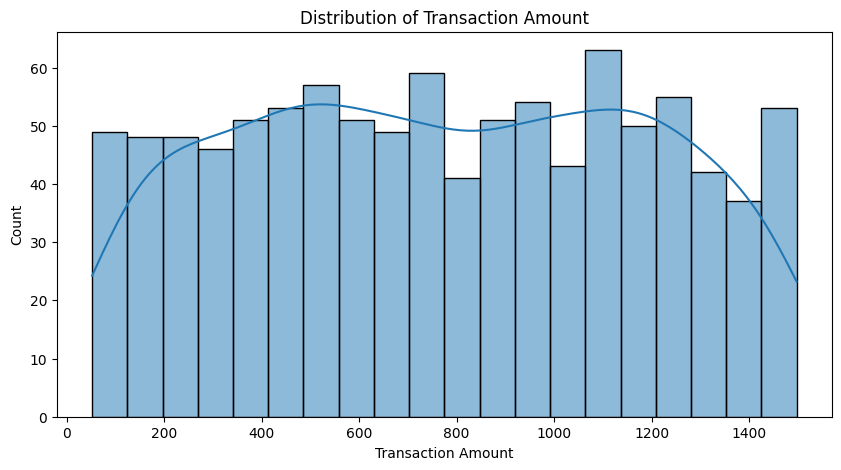

In [5]:
# Transaction Amount distribution
plt.figure(figsize=(10, 5))
sns.histplot(dat_trans['Transaction Amount'], kde=True, bins=20)
plt.title("Distribution of Transaction Amount")
plt.show()

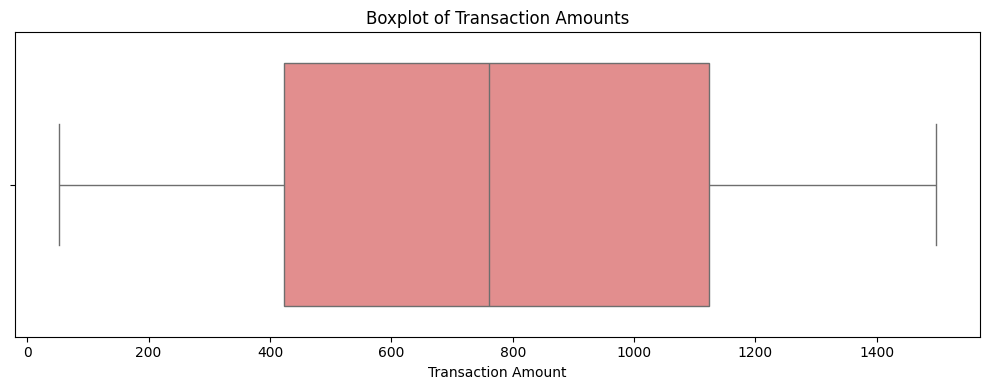

In [21]:
# Boxplot to check for outliers in Transaction Amount
plt.figure(figsize=(10, 4))
sns.boxplot(x=dat_trans['Transaction Amount'], color='lightcoral')
plt.title('Boxplot of Transaction Amounts')
plt.xlabel('Transaction Amount')
plt.tight_layout()
plt.show()

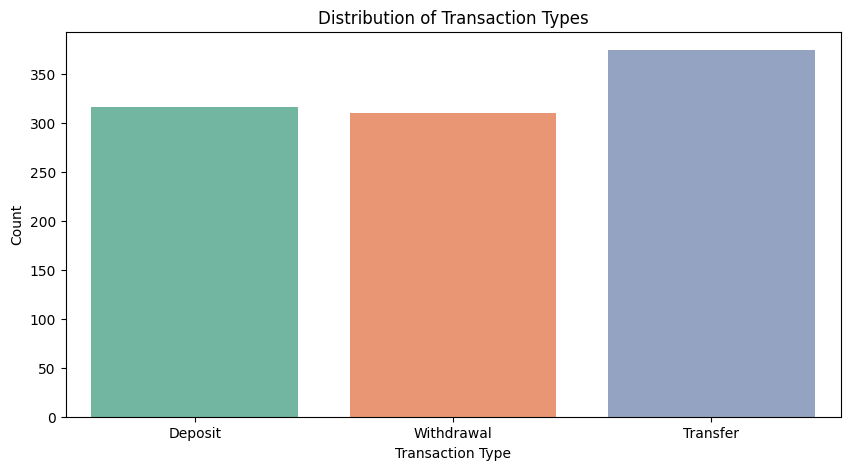

In [12]:
# Countplot of Transaction Type
plt.figure(figsize=(10, 5))
sns.countplot(data=dat_trans, x='Transaction Type', hue='Transaction Type', palette='Set2', legend=False)
plt.title('Distribution of Transaction Types')
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.show()

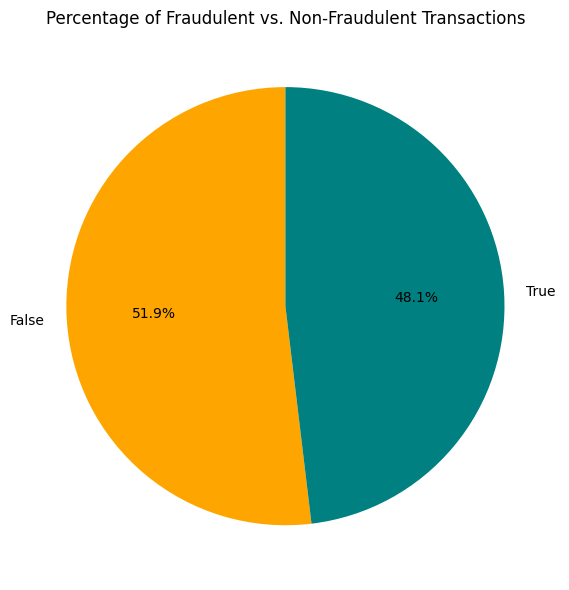

In [8]:
# Fraud Flag proportion pie chart
fraud_counts = dat_trans['Fraud Flag'].value_counts(normalize=True) * 100
plt.figure(figsize=(6, 6))
plt.pie(fraud_counts, labels=fraud_counts.index, autopct='%1.1f%%', colors=['orange', 'teal'], startangle=90)
plt.title('Percentage of Fraudulent vs. Non-Fraudulent Transactions')
plt.tight_layout()
plt.show()

## Correlation Among Attributes

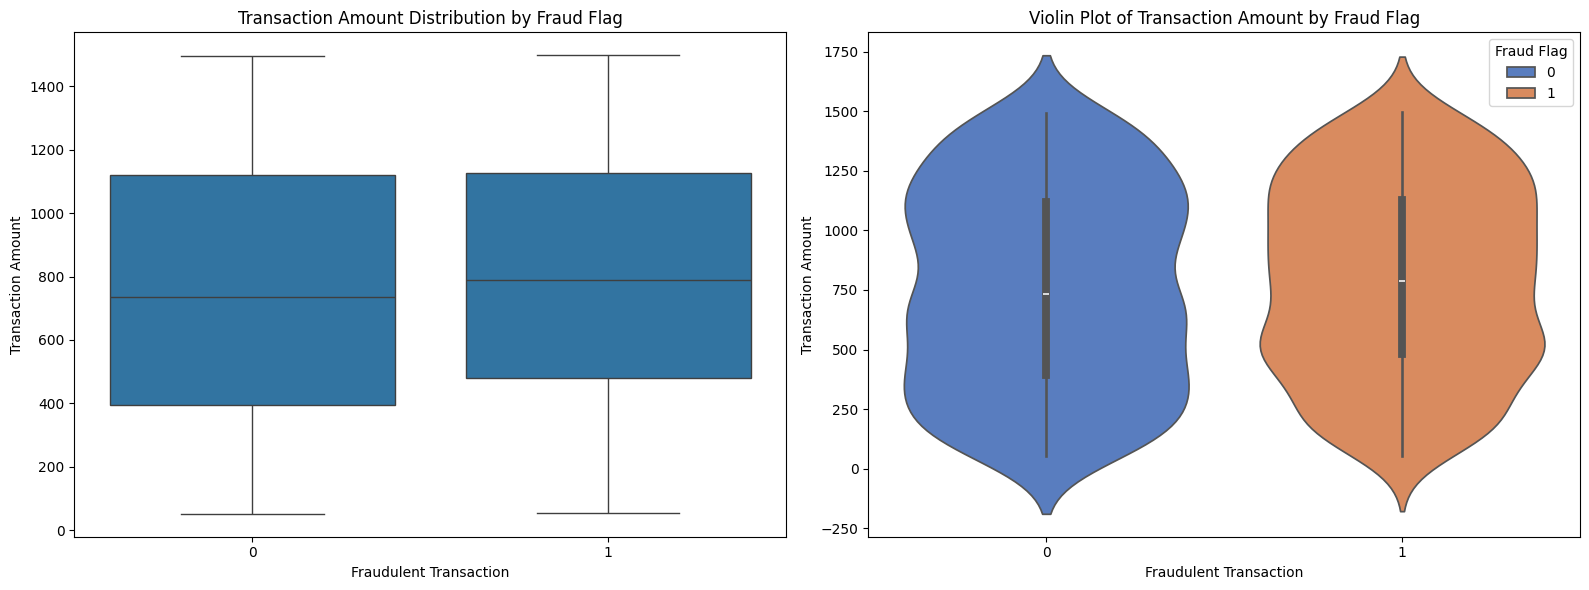

In [13]:
fig, axs = plt.subplots(1, 2, figsize=(16, 6))
sns.boxplot(x='Fraud Flag', y='Transaction Amount', data=dat_trans, ax=axs[0])
axs[0].set_title('Transaction Amount Distribution by Fraud Flag')
axs[0].set_xlabel('Fraudulent Transaction')
axs[0].set_ylabel('Transaction Amount')
sns.violinplot(data=dat_trans, x='Fraud Flag', y='Transaction Amount', hue='Fraud Flag', palette='muted', ax=axs[1])
axs[1].set_title('Violin Plot of Transaction Amount by Fraud Flag')
axs[1].set_xlabel('Fraudulent Transaction')
axs[1].set_ylabel('Transaction Amount')
plt.tight_layout()
plt.show()

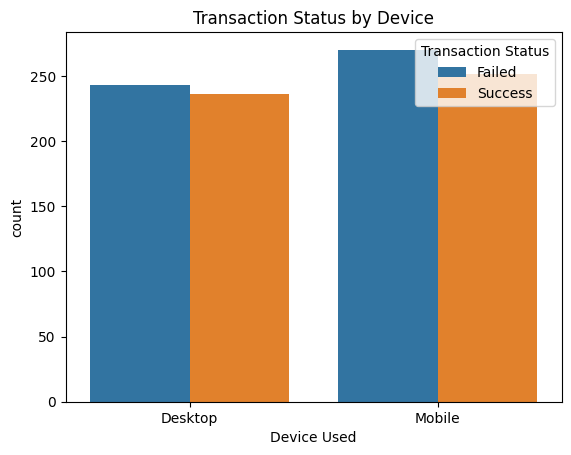

In [14]:
# Transaction Status vs Device
sns.countplot(x='Device Used', hue='Transaction Status', data=dat_trans)
plt.title("Transaction Status by Device")
plt.show()

## Analyzing Feature Interactions

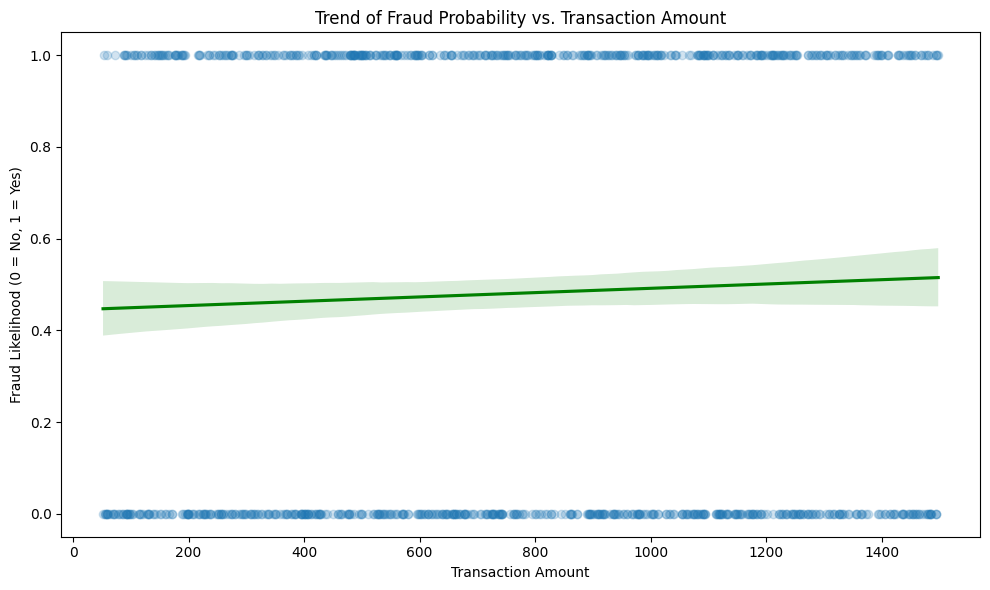

In [15]:
#Do higher Transaction Amounts have a higher fraud rate?
dat_trans['Fraud Flag'] = dat_trans['Fraud Flag'].astype(int)
plt.figure(figsize=(10, 6))
sns.regplot(
    x='Transaction Amount',
    y='Fraud Flag',
    data=dat_trans,
    scatter_kws={'alpha': 0.2},
    line_kws={'color': 'green'}
)
plt.title("Trend of Fraud Probability vs. Transaction Amount")
plt.xlabel("Transaction Amount")
plt.ylabel("Fraud Likelihood (0 = No, 1 = Yes)")
plt.tight_layout()
plt.show()

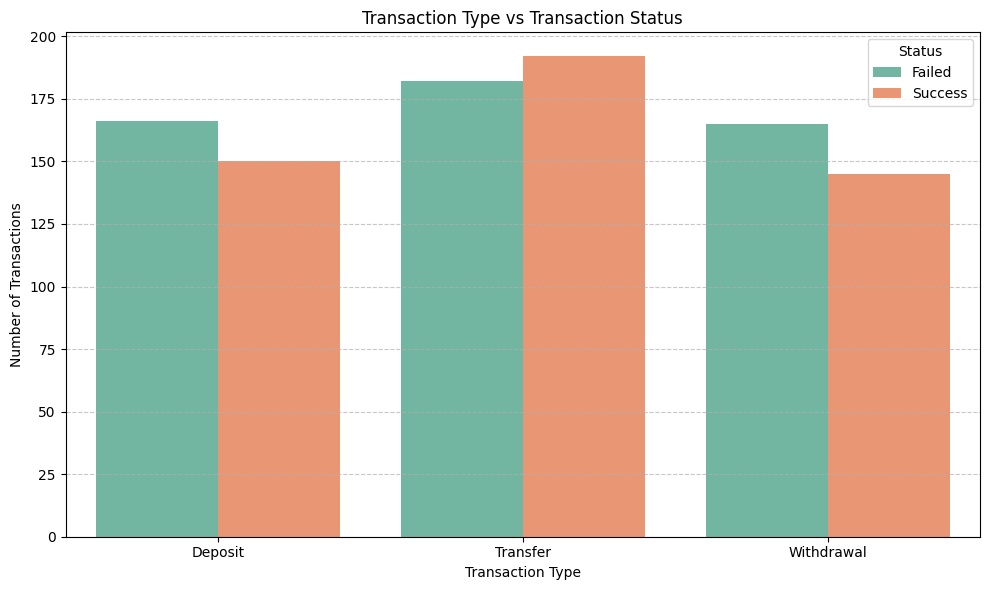

In [5]:
#How does Transaction Type impact Transaction Status?
status_counts = dat_trans.groupby(['Transaction Type', 'Transaction Status']).size().reset_index(name='Count')
plt.figure(figsize=(10, 6))
sns.barplot(data=status_counts, x='Transaction Type', y='Count', hue='Transaction Status', palette='Set2')
plt.title('Transaction Type vs Transaction Status')
plt.xlabel('Transaction Type')
plt.ylabel('Number of Transactions')
plt.legend(title='Status')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

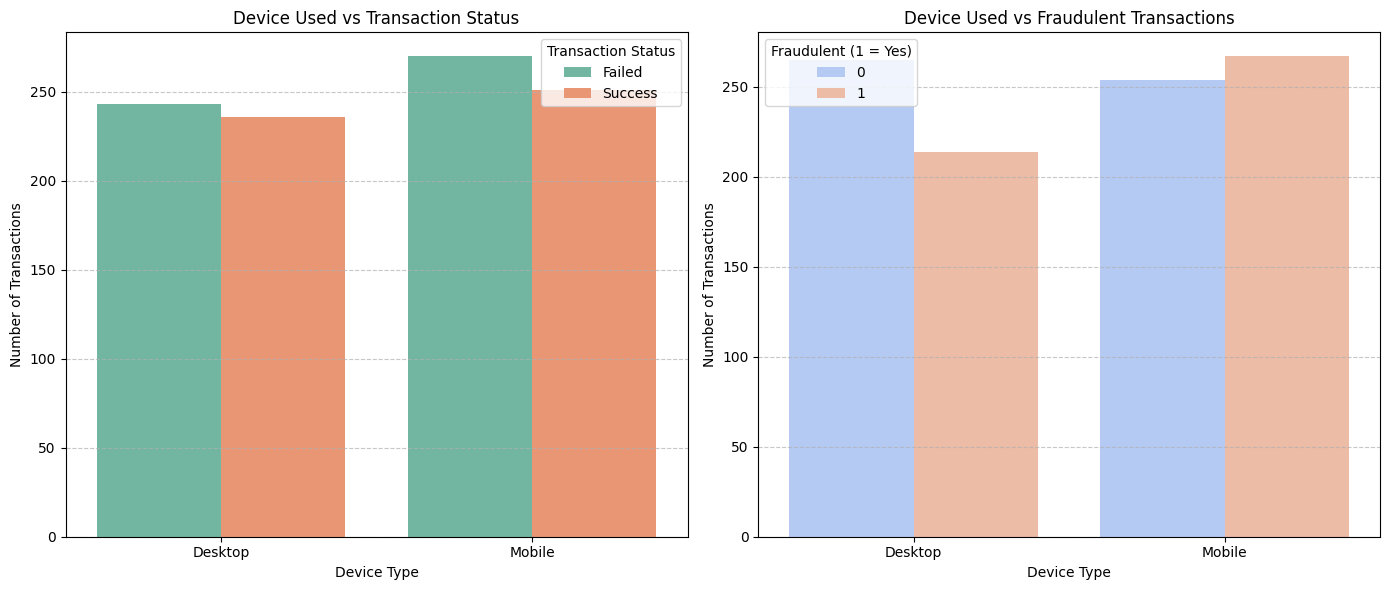

In [8]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
device_status = dat_trans.groupby(['Device Used', 'Transaction Status']).size().reset_index(name='Count')
sns.barplot(data=device_status, x='Device Used', y='Count', hue='Transaction Status', palette='Set2', ax=axes[0])
axes[0].set_title('Device Used vs Transaction Status')
axes[0].set_ylabel('Number of Transactions')
axes[0].set_xlabel('Device Type')
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

device_fraud = dat_trans.groupby(['Device Used', 'Fraud Flag']).size().reset_index(name='Count')
sns.barplot(data=device_fraud, x='Device Used', y='Count', hue='Fraud Flag', palette='coolwarm', ax=axes[1])
axes[1].set_title('Device Used vs Fraudulent Transactions')
axes[1].set_ylabel('Number of Transactions')
axes[1].set_xlabel('Device Type')
axes[1].legend(title='Fraudulent (1 = Yes)')
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()